In [1]:
## pip install matplotlib numpy librosa scipy noisereduce 

## Unzip the speech_data file parallel to this notebook.
!pip install speechbrain
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 96.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 177.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 189.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 213.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 230.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 257.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 226.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 240.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 213.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [2]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [15]:
!pip install faster_whisper

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 219.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 220.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import noisereduce as nr
import soundfile as sf
import IPython
import pyloudnorm as pyln
import os
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio
import time

/usr/local/lib/python3.10/dist-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []


In [2]:
# I'm the main speaker


# 2 3 8

# 1 9 4

# 7 5 6

In [5]:
meter = pyln.Meter(16000)

In [4]:
#sepformerwham_model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement4') #8K sampling rate
sepformerwham_model = separator.from_hparams(source="speechbrain/sepformer-whamr16k", savedir='pretrained_models/sepformer-whamr16k')

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr16k' if not cached


hyperparams.yaml:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr16k' if not cached
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr16k' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr16k' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr16k' if not cached


decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: masknet, encoder, decoder


In [12]:
tot = len(os.listdir('speech_data/ttsh_data'))

for f in os.listdir('speech_data/ttsh_data'):
# for f in ['wei_talk.mp3']:
    if '.mp3' in f:
        f_ = f.split('.mp3')[0]
        path = 'speech_data/ttsh_data/wavs/'+f_+'.wav' #16k
        start_time = time.perf_counter()
        enhanced_speech = sepformerwham_model.separate_file(path=path) #16k
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        
        i=0
        loudness_ftrack = meter.integrated_loudness(enhanced_speech[0][:, 0].cpu().numpy())
        loudness_strack = meter.integrated_loudness(enhanced_speech[0][:, 1].cpu().numpy())
        if int(loudness_strack)>int(loudness_ftrack): #If the diff in loudness is more than 1db, then choose the second track.
            i=1
        print(f"Execution time: {execution_time:.4f} seconds - {path}", enhanced_speech.shape, 'Choosing track = ', i, loudness_ftrack, loudness_strack)
        sf.write('speech_data/ttsh_data/sepformerwham16k/'+f_+'_sepformerwham16k.wav', enhanced_speech[0][:, i], 16000)


Execution time: 113.4419 seconds - speech_data/ttsh_data/wavs/Joshua Chong_talk.wav torch.Size([1, 267494, 2]) Choosing track =  0 -20.779899679683854 -20.702241957563114
Execution time: 116.9646 seconds - speech_data/ttsh_data/wavs/henry_talk.wav torch.Size([1, 288810, 2]) Choosing track =  0 -20.58951652318424 -24.587638601889918
Execution time: 104.0819 seconds - speech_data/ttsh_data/wavs/rizi_talk.wav torch.Size([1, 218175, 2]) Choosing track =  0 -16.550702642266653 -20.098410501109786
Execution time: 103.0633 seconds - speech_data/ttsh_data/wavs/Joshua Chong_Numbers.wav torch.Size([1, 213160, 2]) Choosing track =  0 -20.49517842367168 -20.120221508601063
Execution time: 99.3266 seconds - speech_data/ttsh_data/wavs/wei_talk.wav torch.Size([1, 200621, 2]) Choosing track =  1 -27.4241298427025 -17.06008956017962
Execution time: 102.8706 seconds - speech_data/ttsh_data/wavs/henry_numbers.wav torch.Size([1, 221101, 2]) Choosing track =  0 -17.446065879068296 -23.401873472628083
Execu

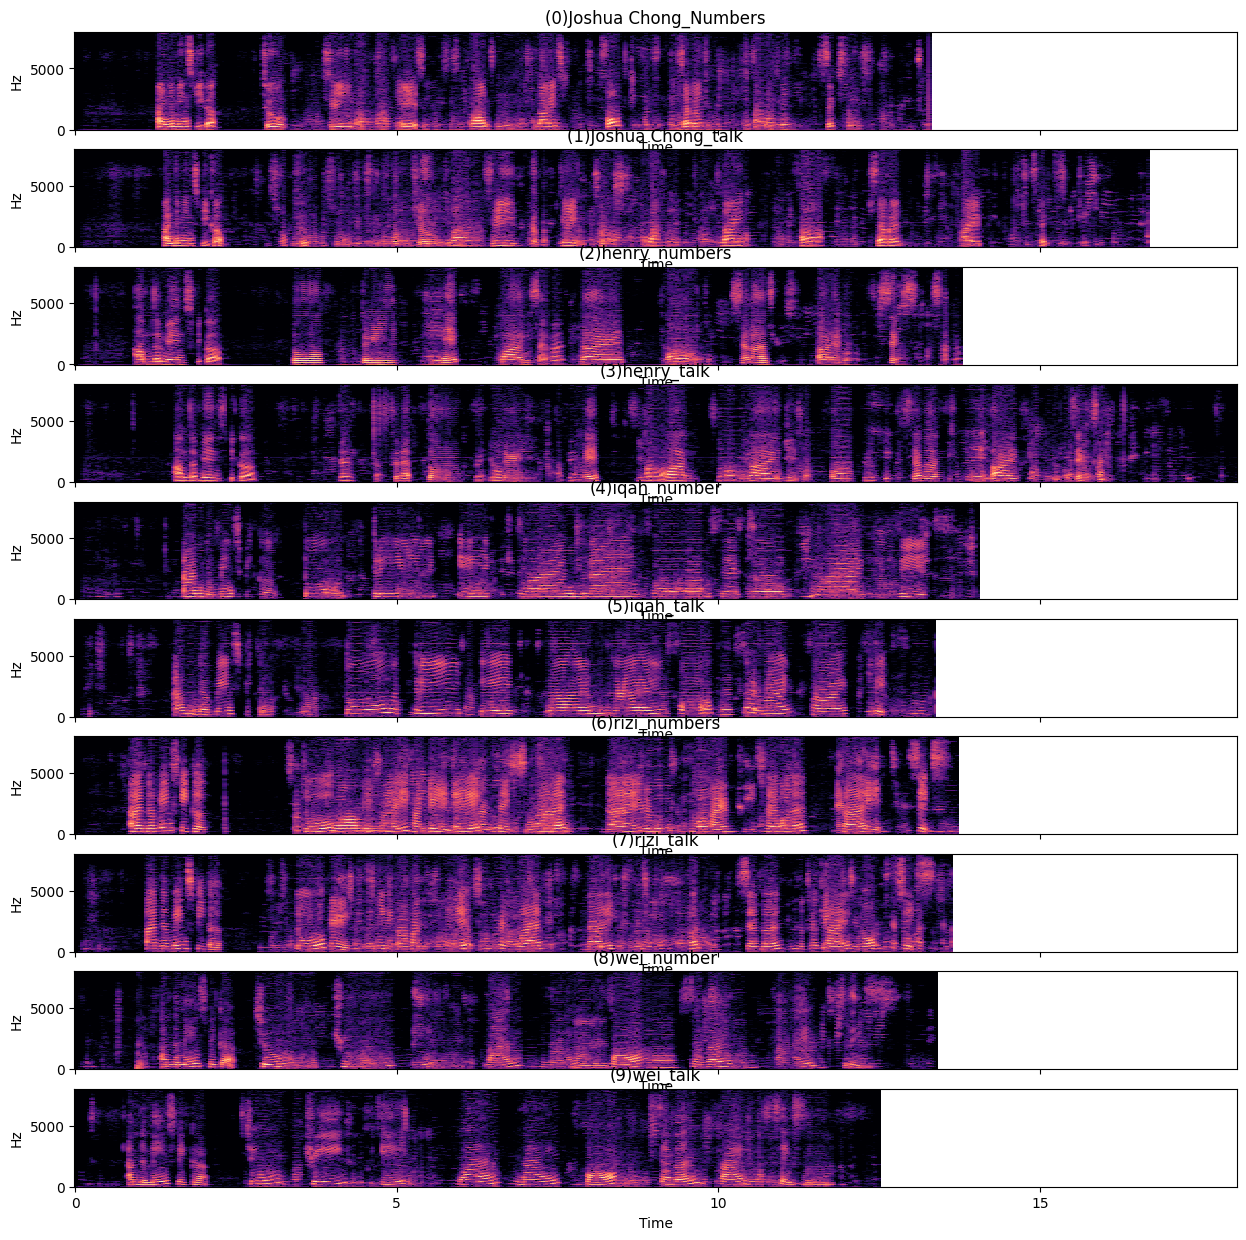

In [13]:
wavs = sorted([_ for _ in os.listdir('speech_data/ttsh_data') if '.mp3' in _])

fig, ax = plt.subplots(nrows=len(wavs), ncols=1, sharex=True, figsize=(15,15))

for ind, f in enumerate(wavs):
    if '.mp3' in f:
        f_ = f.split('.mp3')[0]
        y1, sr = librosa.load('speech_data/ttsh_data/sepformerwham16k/'+f_+'_sepformerwham16k.wav', sr=16000) 

        D = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
        img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                       sr=sr, ax=ax[ind])
        ax[ind].set_title('('+str(ind)+')'+f_)

        
        IPython.display.display(IPython.display.Audio('speech_data/ttsh_data/sepformerwham16k/'+f_+'_sepformerwham16k.wav'))


In [16]:
from faster_whisper import WhisperModel

model_size = "large-v3"

# Run on GPU with FP16
faster_whisper_model = WhisperModel(model_size, device="cuda", compute_type="float16")

vocabulary.json:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

In [21]:
wavs = [_ for _ in os.listdir('speech_data/ttsh_data') if '.mp3' in _]

wavs = sorted(wavs)
print(wavs)

for ind, f in enumerate(wavs):
    if '.mp3' in f:
        f_ = f.split('.mp3')[0]

        print('Transcribing: '+'speech_data/ttsh_data/sepformerwham16k/'+f_+'_sepformerwham16k.wav')
        segments, _ = faster_whisper_model.transcribe('speech_data/ttsh_data/sepformerwham16k/'+f_+'_sepformerwham16k.wav', language="en")
        for seg in segments:
            print(seg.text)
            
        print('Transcribing: '+'speech_data/ttsh_data/wavs/'+f_+'.wav')
        segments, _ = faster_whisper_model.transcribe('speech_data/ttsh_data/wavs/'+f_+'.wav', language="en")
        for seg in segments:
            print(seg.text)
        print('\n\n')

['Joshua Chong_Numbers.mp3', 'Joshua Chong_talk.mp3', 'henry_numbers.mp3', 'henry_talk.mp3', 'iqah_number.mp3', 'iqah_talk.mp3', 'rizi_numbers.mp3', 'rizi_talk.mp3', 'wei_number.mp3', 'wei_talk.mp3']
Transcribing: speech_data/ttsh_data/sepformerwham16k/Joshua Chong_Numbers_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.322


 I'm the main speaker. 2, 3, 8, 1, 9, 4, 7, 8, 6, 7, 8.
Transcribing: speech_data/ttsh_data/wavs/Joshua Chong_Numbers.wav


INFO:faster_whisper:Processing audio with duration 00:13.322


 I'm the main speaker.
 2,3,4,5,6,7,8,9,10,11



Transcribing: speech_data/ttsh_data/sepformerwham16k/Joshua Chong_talk_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:16.718


 I'm the mean speaker.
 2, 9, 3, 8, 6, 1, 9, 4, 7, 5, 6.
Transcribing: speech_data/ttsh_data/wavs/Joshua Chong_talk.wav


INFO:faster_whisper:Processing audio with duration 00:16.718


 I'm the main speaker.
 It's whatever, it's what you need.
 It's what you need.
 3, 8, 9, 4, 7, 5, 6, 3, 4.



Transcribing: speech_data/ttsh_data/sepformerwham16k/henry_numbers_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.819


 I'm the main speaker. 2, 3, 8, 1, 7, 9, 4, 7, 5, 6, 7.
Transcribing: speech_data/ttsh_data/wavs/henry_numbers.wav


INFO:faster_whisper:Processing audio with duration 00:13.819


 I'm the main speaker.
 2, 3, 8, 1, 7, 9, 4, 7, 3, 5, 6, 7.



Transcribing: speech_data/ttsh_data/sepformerwham16k/henry_talk_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:18.051


 I'm the main speaker.
 Then, step two, three, eight,
 one, nine,
 four, seven,
 five, six, seven,
Transcribing: speech_data/ttsh_data/wavs/henry_talk.wav


INFO:faster_whisper:Processing audio with duration 00:18.051


 I'm the main speaker.
 2, 3, 8, 1, 9, 5, 4, 5, 6, 7, 8, 9, 10, 11.



Transcribing: speech_data/ttsh_data/sepformerwham16k/iqah_number_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:14.054


 I'm the main speaker. 2, 3, 8, 1, 9, 4, 7, 8, 6.
Transcribing: speech_data/ttsh_data/wavs/iqah_number.wav


INFO:faster_whisper:Processing audio with duration 00:14.054


 I'm the main speaker.
 2, 3, 8, 9, 9, 4, 7, 8, 9, 10.



Transcribing: speech_data/ttsh_data/sepformerwham16k/iqah_talk_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.401


 I'm the main speaker.
 2, 3, 8, 1, 9, 4, 7, 5, 6.
Transcribing: speech_data/ttsh_data/wavs/iqah_talk.wav


INFO:faster_whisper:Processing audio with duration 00:13.401


 I'm the main speaker.
 2, 3, 8, 1, 9, 4, 7, 5, 6.



Transcribing: speech_data/ttsh_data/sepformerwham16k/rizi_numbers_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.740


 I'm the main speaker.
 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30.
Transcribing: speech_data/ttsh_data/wavs/rizi_numbers.wav


INFO:faster_whisper:Processing audio with duration 00:13.740


 I'm the main speaker.
 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30.



Transcribing: speech_data/ttsh_data/sepformerwham16k/rizi_talk_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.636


 I'm the main speaker.
 2, 8, 9, 10, 11, 12, 13, 14, 15, 16.
Transcribing: speech_data/ttsh_data/wavs/rizi_talk.wav


INFO:faster_whisper:Processing audio with duration 00:13.636


 I'm the main speaker.
 2, 3, 4, 5, 6, 7, 8, 9, 10.



Transcribing: speech_data/ttsh_data/sepformerwham16k/wei_number_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:13.427


 I'm the main speaker. 2, 3, 2, 1, 9, 4, 7, 5, 6.
Transcribing: speech_data/ttsh_data/wavs/wei_number.wav


INFO:faster_whisper:Processing audio with duration 00:13.427


 I'm the main speaker. 2, 3, 8, 1, 9, 4, 7, 5, 6.



Transcribing: speech_data/ttsh_data/sepformerwham16k/wei_talk_sepformerwham16k.wav


INFO:faster_whisper:Processing audio with duration 00:12.539


 I'm the main speaker. 2, 3, 8, 1, 9, 4, 7, 5, 6.
Transcribing: speech_data/ttsh_data/wavs/wei_talk.wav


INFO:faster_whisper:Processing audio with duration 00:12.539


 I'm the main speaker.
 2, 3, 8, 1, 9, 4, 7, 5, 6.



